<a href="https://colab.research.google.com/github/NaydelinAidee/Simulaci-nI/blob/main/MonteCarloAciertoyError.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Método de Monte Carlo de Acierto y Error.**

NAYDELIN AIDEE CARCAMO HERNANDEZ

Este metodo es una técnica para estimar el valor de una integral utilizando números aleatorios. La idea principal es generar puntos aleatorios en un área conocida y contar cuántos caen debajo de la curva de la función.

Consiste en los siguientes pasos:

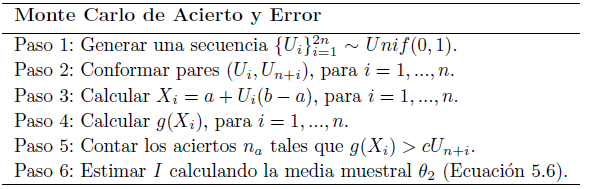

A continuacion implmentaremos un codigo en phyton que ilustra comofunciona el metodo.

Primero importamos  las librerias necesarias para generar los numeros aleatorios,graficar y obtener la solucion exacta de una integral.

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.integrate import quad

Definimos una funcion que sera la quevamos a aproximar, es decir que queremos calcular la integral de f(x) en el intervalo [0,1],ademas en x se generan 400 puntos en el intervalo.


In [ ]:
def f(x):
    return np.sqrt(np.arctan(x))

a, b = 0, 1  #Límites
x = np.linspace(a, b, 400)
y = f(x)
N = 1000  #Número de puntos aleatorios

Aqui definimos una funcion donde n es el número de puntos aleatorios a generardentro contará cuántos puntos aleatorios caen bajo la curva de la función,for para repetir n veces el proceso de generación de puntos y Si el punto está dentro del área bajo la curva, se suma 1 al contador dentro.

In [ ]:
#Estimación con Monte Carlo
def mc(n):
    dentro = 0
    for _ in range(n):
        x_rand = random.uniform(a, b)
        y_rand = random.uniform(0, f(1))
        if y_rand <= f(x_rand):
            dentro += 1
    return dentro

La función experimento(m) hace m experimentos Monte Carlo usando la función mc(N),se encarga de repetir el proceso de estimación varias veces.



In [ ]:
def experimento(m):
    lista = []
    for i in range(m):
        d = mc(N)   #Se usa el mismo número de dardos en cada experimento
        lista.append(d)
    return lista

Aqui se compara la estimación de la integral por el método de Monte Carlo con el valor exacto calculado numéricamente.

In [ ]:
dentro = mc(N)
integral_aprox = (b - a) * f(1) * (dentro / N)

integral_exacta, _ = quad(f, a, b )   #Integral exacta
error = abs(integral_aprox - integral_exacta)

Por ultimo graficamos

In [ ]:
#GRAFICA
plt.figure(figsize=(8, 5))
plt.axhline(f(1), color="blue", linestyle="--")
plt.axvline(1, color="blue", linestyle="--")
plt.plot(x, y, label=r'$f(x) = \sqrt{\arctan(x)}$', color='black')
# puntos aleatorios
x_rand = np.random.uniform(a, b, N)
y_rand = np.random.uniform(0, f(1), N)
plt.scatter(x_rand, y_rand, color="purple", s=2, alpha=0.5, label="Puntos aleatorios") #alpha:porcentaje de puntos (0-1)
plt.scatter(x_rand[y_rand <= f(x_rand)], y_rand[y_rand <= f(x_rand)], color="pink", s=2, alpha=0.5, label="Puntos bajo la curva")
plt.legend()
plt.title(f"Estimacion: {integral_aprox:.10f}\n")
plt.grid()
plt.show()

print(f"Estimación con Monte Carlo: {integral_aprox:.10f}")
print(f"Integral exacta: {integral_exacta:.10f}")
print(f"Error: {error:.10f}")

Aqui esta el codigo completo

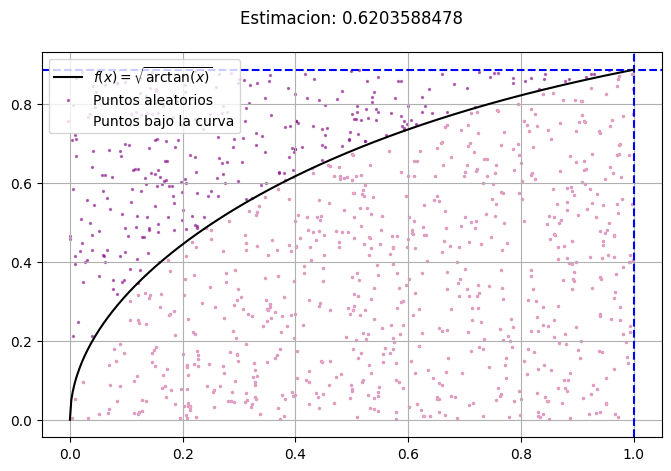

Estimación con Monte Carlo: 0.6203588478
Integral exacta: 0.6298233442
Error: 0.0094644964


In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.integrate import quad  # función para la integración exacta

def f(x):
    return np.sqrt(np.arctan(x))

a, b = 0, 1  #Límites
x = np.linspace(a, b, 400)
y = f(x)
N = 1000  #Número de puntos aleatorios

#Estimación con Monte Carlo
def mc(n):
    dentro = 0
    for _ in range(n):
        x_rand = random.uniform(a, b)
        y_rand = random.uniform(0, f(1))
        if y_rand <= f(x_rand):
            dentro += 1
    return dentro

def experimento(m):
    lista = []
    for i in range(m):
        d = mc(N)   #Se usa el mismo número de dardos en cada experimento
        lista.append(d)
    return lista

dentro = mc(N)
integral_aprox = (b - a) * f(1) * (dentro / N)

integral_exacta, _ = quad(f, a, b )   #Integral exacta
error = abs(integral_aprox - integral_exacta)

#GRAFICA
plt.figure(figsize=(8, 5))
plt.axhline(f(1), color="blue", linestyle="--")
plt.axvline(1, color="blue", linestyle="--")
plt.plot(x, y, label=r'$f(x) = \sqrt{\arctan(x)}$', color='black')
# puntos aleatorios
x_rand = np.random.uniform(a, b, N)
y_rand = np.random.uniform(0, f(1), N)
plt.scatter(x_rand, y_rand, color="purple", s=2, alpha=0.5, label="Puntos aleatorios") #alpha:porcentaje de puntos (0-1)
plt.scatter(x_rand[y_rand <= f(x_rand)], y_rand[y_rand <= f(x_rand)], color="pink", s=2, alpha=0.5, label="Puntos bajo la curva")
plt.legend()
plt.title(f"Estimacion: {integral_aprox:.10f}\n")
plt.grid()
plt.show()

print(f"Estimación con Monte Carlo: {integral_aprox:.10f}")
print(f"Integral exacta: {integral_exacta:.10f}")
print(f"Error: {error:.10f}")